## GRE Admission Predictor

In [1]:
import numpy as np 
import pandas as pd 

In [9]:
df=pd.read_csv('student_data_for_ms.csv')

In [13]:
df.sample(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
315,316,308,104,2,2.5,3.0,8.07,0,0.65
323,324,305,102,2,2.0,2.5,8.18,0,0.62
488,489,322,112,3,3.0,4.0,8.62,1,0.76


In [10]:
df.shape

(500, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [16]:
df.duplicated().sum()

0

In [19]:
df.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


While Working with Neural Network,  
Common Wisdom is that ki 
Jo input hai usko Same Scale pr Leekr aajao 

Jo Inddifference of Scale hai vo Delay deta hai 

Use Minmax 
jbh humme Upper Bound  & Lower Bound pata hoo 

so yaha tight upper bound hai   
GRE mai 340 hie hoskta hai & TOEFL mai 120 hie hoskta


In [30]:
x = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [31]:
# x
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [35]:
x_train.shape

(400, 7)

In [37]:
x_test.shape

(100, 7)

In [40]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

In [43]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [45]:
x_train.sample(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
114,311,105,3,3.5,3.0,8.45,1
95,304,100,4,1.5,2.5,7.84,0
161,298,99,1,1.5,3.0,7.46,0


In [48]:
import tensorflow
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense

In [50]:
model = Sequential() 

In [66]:
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
 dense_2 (Dense)             (None, 7)                 14        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
 dense_6 (Dense)             (None, 7)                

In [68]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [80]:
history = model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 5/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0039 - val_loss: 0.0042
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 7/100
10/10 [==============================] - 0s 12ms/step - loss: 0.0038 - val_loss: 0.0040
Epoch 8/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 9/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0038 - val_loss: 0.0041
Epoch 10/100
10/10 [==============================] - 0s 15ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch

In [75]:
y_pred=model.predict(x_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [81]:
from sklearn.metrics import r2_score

In [82]:
r2_score(y_test,y_pred)

0.8083174193698979

In [83]:
import matplotlib.pyplot as plt 

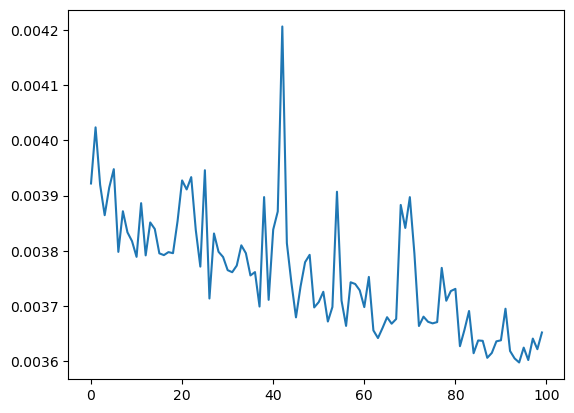

In [84]:
plt.plot(history.history['loss'])

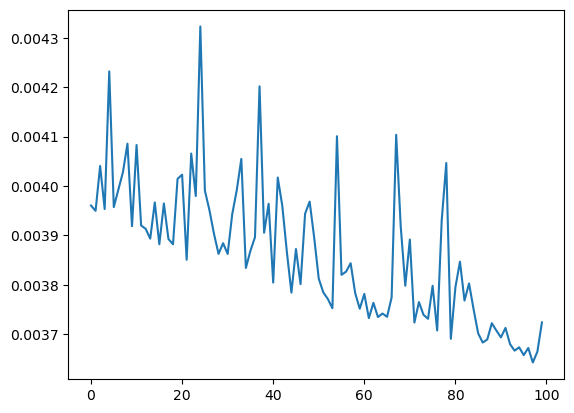

In [87]:
plt.plot(history.history['val_loss'])